# Blue Owl Simple Challenge
### Liu  02/15/2020

### Summary: I use the CatBoost classifier to predict the likelihood of the ${\tt outcome}$ variable being equal to 1 with an expected AUC of 0.831.

## 1. Exploratory Data Analysis

### 1.1  Data Examination & Cleaning

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
def load_csv(train='train.csv',test='test.csv'):
    """
    Load your original data.
    
    Arguments:
    - train: csv file of training data
    - test: csv file of test data
    
    Returns:
    - train_data: DataFrame object for training data
    - test_data: DataFrame object for test data
    """
    train_data = pd.read_csv(train)
    test_data = pd.read_csv(test)
    
    return train_data, test_data

In [5]:
train_data, test_data = load_csv()
train_data.head()

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
0,56,0.005737,iPhone,M,0,62717,2,1,4,0
1,50,0.004733,desktop,F,0,64328,2,3,2,0
2,54,0.004129,laptop,M,0,83439,1,3,7,0
3,16,0.005117,Android,F,0,30110,2,3,0,0
4,37,0.003635,desktop,M,0,76565,2,1,5,0


In [6]:
test_data.head()

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure
0,34,0.005134,Android,F,1,40376,1,3,7
1,53,0.005223,desktop,F,1,84511,1,1,11
2,46,0.004939,laptop,F,0,79322,1,1,4
3,36,0.004924,Android,F,0,63295,1,2,0
4,28,0.005146,other,F,1,36170,1,3,3


In [7]:
train_data.shape,test_data.shape

((10000, 10), (10000, 9))

In [8]:
train_data.describe()

,age,cost_of_ad,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.0000
mean,37.991800,0.004666,0.497500,58004.335800,1.497000,2.00220,5.406800,0.0982
std,13.038203,0.000838,0.500019,17330.778355,0.500016,0.81784,5.046014,0.2976
min,16.000000,0.003171,0.000000,16241.000000,1.000000,1.00000,0.000000,0.0000
25%,27.000000,0.003995,0.000000,45533.500000,1.000000,1.00000,1.000000,0.0000
50%,38.000000,0.004625,0.000000,58053.500000,1.000000,2.00000,4.000000,0.0000
75%,49.000000,0.005164,1.000000,70235.250000,2.000000,3.00000,8.000000,0.0000
max,60.000000,0.007082,1.000000,99956.000000,2.000000,3.00000,22.000000,1.0000


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         10000 non-null  int64  
 1   cost_of_ad                  10000 non-null  float64
 2   device_type                 10000 non-null  object 
 3   gender                      9731 non-null   object 
 4   in_initial_launch_location  10000 non-null  int64  
 5   income                      10000 non-null  int64  
 6   n_drivers                   10000 non-null  int64  
 7   n_vehicles                  10000 non-null  int64  
 8   prior_ins_tenure            10000 non-null  int64  
 9   outcome                     10000 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 781.4+ KB


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         10000 non-null  int64  
 1   cost_of_ad                  10000 non-null  float64
 2   device_type                 10000 non-null  object 
 3   gender                      9751 non-null   object 
 4   in_initial_launch_location  10000 non-null  int64  
 5   income                      10000 non-null  int64  
 6   n_drivers                   10000 non-null  int64  
 7   n_vehicles                  10000 non-null  int64  
 8   prior_ins_tenure            10000 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 703.2+ KB


In [11]:
print(train_data['device_type'].unique())
print(train_data['gender'].unique())
print(train_data['in_initial_launch_location'].unique())
print(train_data['n_drivers'].unique())
print(train_data['n_vehicles'].unique())
print(train_data['prior_ins_tenure'].unique())
print(train_data['outcome'].unique())

['iPhone' 'desktop' 'laptop' 'Android' 'other']
['M' 'F' nan]
[0 1]
[2 1]
[1 3 2]
[ 4  2  7  0  5  1 10  8  3  6 11 18  9 17 16 19 13 12 15 14 22 21 20]
[0 1]


I check the unique values of seemingly categorical variables. I find there are 9 features available in which ${\tt device\_type}$, ${\tt gender}$, ${\tt in\_initial\_launch\_location}$, ${\tt n\_drivers}$, ${\tt n\_vehicles}$ can be considered categorical variables while ${\tt age}$, ${\tt cost\_of\_ad}$, ${\tt income}$, ${\tt prior\_ins\_tenure}$ are quantitative variables. The variable ${\tt outcome}$ is the categorical response I need to predict in the test data. 

The sample size is 10,000 for both traing data and test data. There are only missing data in the ${\tt gender}$ column in both training data and test data. For now I change the null values to a third class named "Unknown".

In practice, I will have a background about the data and know in advance if a variable is quantitative or categorical. I should also investigate why the data is missing since the missing data could represent a special class and the underlying process causing their missing can provide insights. But I will not investigate this problem this time.

In [12]:
def na_gender(train_data, test_data):
    """
    Change the nan in 'gender' to "Unknown"
    
    Argumens:
    - train_data: DataFrame object for training data
    - test_data: DataFrame object for test data
    
    Returns:
    - train_data: DataFrame object for training data
    - test_data: DataFrame object for test data
    """
    train_data['gender'].fillna('Unknown', inplace = True) 
    test_data['gender'].fillna('Unknown', inplace = True) 
    
    return train_data, test_data

In [13]:
train_data, test_data = na_gender(train_data, test_data)

### 1.2 Exploratory Data Analysis

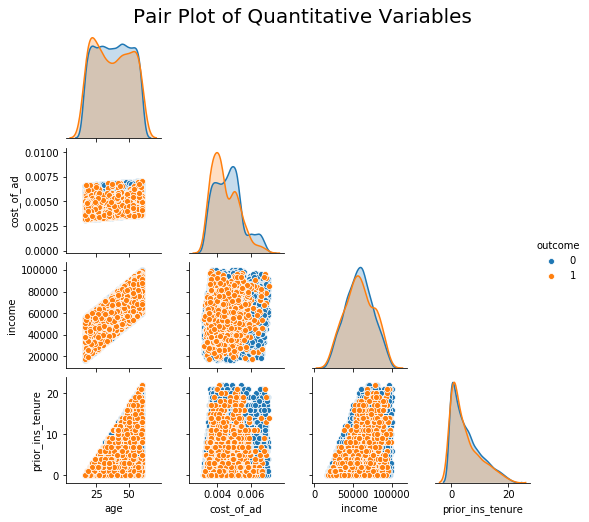

In [15]:
sns.pairplot(train_data,vars=['age','cost_of_ad','income','prior_ins_tenure'],hue = 'outcome',corner=True,height=1.8)
plt.suptitle('Pair Plot of Quantitative Variables',size=20)
plt.subplots_adjust(top=0.93, wspace=0.3)

We can see ${\tt age}$ and ${\tt income}$ are strongly correlated while the correlations between other quantities are not clear. ${\tt cost\_of\_ad}$ seems to make a difference in ${\tt outcome}$ while the impact of other quantities are not strong.

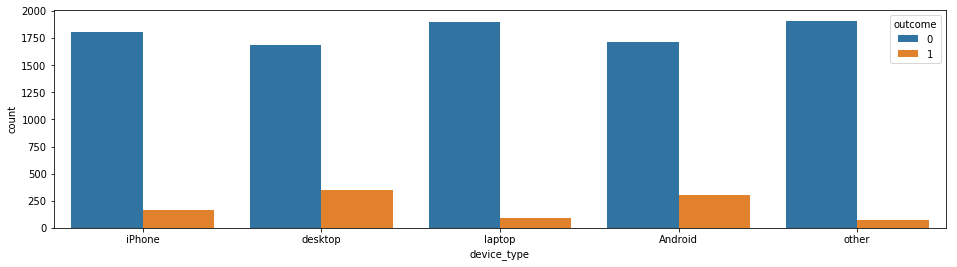

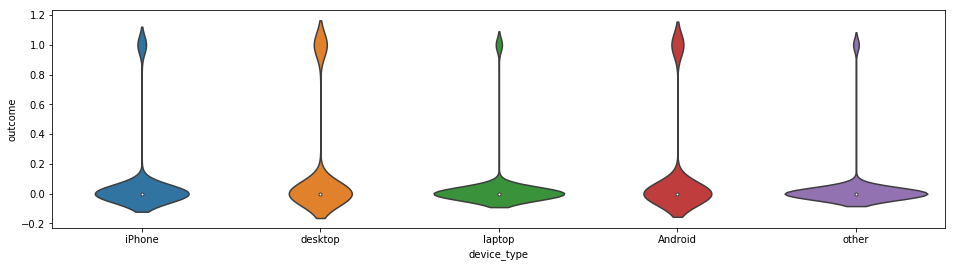

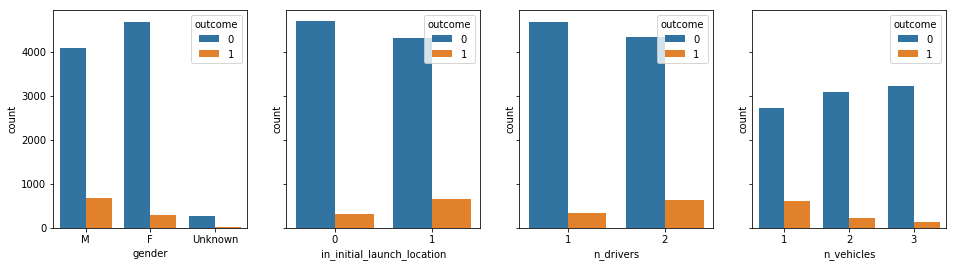

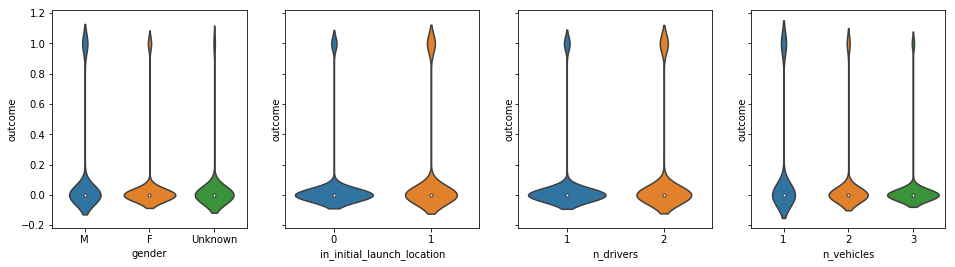

In [16]:
f = plt.figure(figsize=(16,4))
sns.countplot(x='device_type', hue='outcome', data=train_data)
f = plt.figure(figsize=(16,4))
sns.violinplot(x='device_type', y='outcome', data=train_data)
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16,4))
sns.countplot(x='gender', hue='outcome', data=train_data, ax=axes[0])
sns.countplot(x='in_initial_launch_location', hue='outcome', data=train_data, ax=axes[1])
sns.countplot(x='n_drivers', hue='outcome', data=train_data, ax=axes[2])
sns.countplot(x='n_vehicles', hue='outcome', data=train_data, ax=axes[3])
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16,4))
sns.violinplot(x='gender', y='outcome', data=train_data, ax=axes[0])
sns.violinplot(x='in_initial_launch_location', y='outcome', data=train_data, ax=axes[1])
sns.violinplot(x='n_drivers', y='outcome', data=train_data, ax=axes[2])
sns.violinplot(x='n_vehicles', y='outcome', data=train_data, ax=axes[3])

First, from the histgrams we can see the sample size of class ${\tt outcome}=0$ is much larger than the class ${\tt outcome}=1$. Second, from the violin plots we can more clearly see the categorical variables all have some influence on ${\tt outcome}$. For example, data with ${\tt device\_type}$ of "laptop" and "other" are more likely to be in class 0 than "desktop" and "Android". 

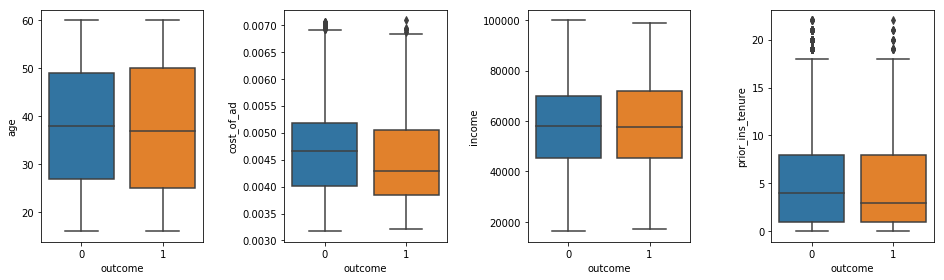

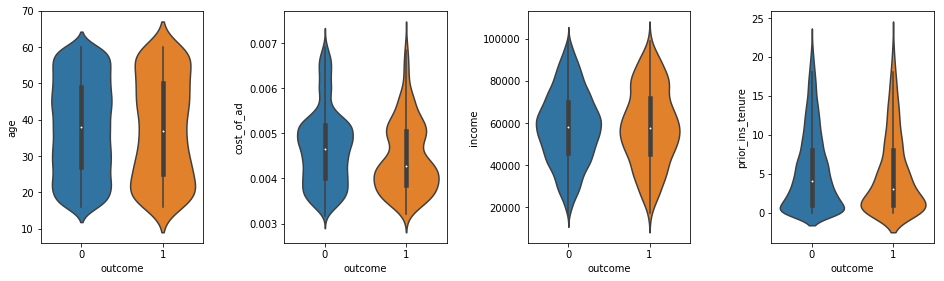

In [17]:
f, axes = plt.subplots(1, 4, figsize=(16,4))
plt.subplots_adjust(top=0.93, wspace=0.5)
sns.boxplot(x='outcome', y='age', data=train_data, ax=axes[0])
sns.boxplot(x='outcome', y='cost_of_ad', data=train_data, ax=axes[1])
sns.boxplot(x='outcome', y='income', data=train_data, ax=axes[2])
sns.boxplot(x='outcome', y='prior_ins_tenure', data=train_data, ax=axes[3])
f, axes = plt.subplots(1, 4, figsize=(16,4))
plt.subplots_adjust(top=0.93, wspace=0.5)
sns.violinplot(x='outcome', y='age', data=train_data, ax=axes[0])
sns.violinplot(x='outcome', y='cost_of_ad', data=train_data, ax=axes[1])
sns.violinplot(x='outcome', y='income', data=train_data, ax=axes[2])
sns.violinplot(x='outcome', y='prior_ins_tenure', data=train_data, ax=axes[3])

It seems ${\tt cost\_of\_ad}$ and ${\tt prior\_ins\_tenure}$ may make a difference in ${\tt outcome}$ while ${\tt age}$ and ${\tt income}$ may not have much impact.

### 1.3 Data Preparation

* Turn categorical variables into dummy codes.

In [18]:
def feature_dummy(train_data, test_data, cat_vars, drop=True):
    """
    Turn categorical variables into dummy codes. Drop the first column by default.
    
    Arguments:
    - train_data: DataFrame object for training data
    - test_data: DataFrame object for test data
    - cat_vars: list of categorical variables
    - drop: bool, True to drop the first column.
    
    Returns:
    - train_data_final: DataFrame object for training data
    - test_data_final: DataFrame object for test data
    """
    for var in cat_vars:
        cat_list = pd.get_dummies(train_data[var], prefix=var, drop_first=drop)
        train_data1=train_data.join(cat_list)
        train_data=train_data1
    data_vars=train_data.columns.values.tolist()
    to_keep=[i for i in data_vars if i not in cat_vars]
    train_data_final=train_data[to_keep]
    print(train_data_final.columns.values)
    
    for var in cat_vars:
        cat_list = pd.get_dummies(test_data[var], prefix=var, drop_first=drop)
        test_data1=test_data.join(cat_list)
        test_data=test_data1
    data_vars=test_data.columns.values.tolist()
    to_keep=[i for i in data_vars if i not in cat_vars]
    test_data_final=test_data[to_keep]
    print(test_data_final.columns.values)
    
    return train_data_final, test_data_final

In [19]:
cat_vars=['device_type','gender','in_initial_launch_location','n_drivers', 'n_vehicles' ]
train1, test1 = feature_dummy(train_data, test_data, cat_vars)

['age' 'cost_of_ad' 'income' 'prior_ins_tenure' 'outcome'
 'device_type_desktop' 'device_type_iPhone' 'device_type_laptop'
 'device_type_other' 'gender_M' 'gender_Unknown'
 'in_initial_launch_location_1' 'n_drivers_2' 'n_vehicles_2'
 'n_vehicles_3']
['age' 'cost_of_ad' 'income' 'prior_ins_tenure' 'device_type_desktop'
 'device_type_iPhone' 'device_type_laptop' 'device_type_other' 'gender_M'
 'gender_Unknown' 'in_initial_launch_location_1' 'n_drivers_2'
 'n_vehicles_2' 'n_vehicles_3']


* Shuffle and split training and validation sets.

In [22]:
def split(train_data_final,test_ratio):
    """
    Shuffle and split training and validation sets.
    
    Arguments:
    - train_data_final: DataFrame object for training data
    - test_ratio: the splitting percentage of validation sets
    
    Returns:
    - x_train: DataFrame, features of traning sets
    - y_train: Series, labels of traning sets
    - x_dev: DataFrame, features of validation sets
    - y_dev: Series, labels of validation sets
    
    """
    train, dev = train_test_split(train_data_final, test_size=test_ratio, random_state=0)
    y_train = train['outcome']
    x_train = train.drop(['outcome'],axis=1, inplace=False)
    y_dev = dev['outcome']
    x_dev = dev.drop(['outcome'],axis=1, inplace=False)
    
    return x_train, y_train, x_dev, y_dev

In [23]:
x_train, y_train, x_dev, y_dev = split(train1,0.3)

* Select features by checking their p-values.

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif
print(list(x_train.columns))
f_value, p_value = f_classif(x_train,y_train.values.ravel())
print(p_value)

['age', 'cost_of_ad', 'income', 'prior_ins_tenure', 'device_type_desktop', 'device_type_iPhone', 'device_type_laptop', 'device_type_other', 'gender_M', 'gender_Unknown', 'in_initial_launch_location_1', 'n_drivers_2', 'n_vehicles_2', 'n_vehicles_3']
[7.37516647e-01 1.28111241e-09 3.04434248e-01 4.02580810e-02
 7.81563228e-27 1.98362212e-01 1.38852555e-13 1.97222386e-19
 7.27926458e-35 2.85549145e-03 7.19969854e-25 2.01744807e-17
 9.37609165e-08 2.25020452e-26]


We can see ${\tt age}$ and ${\tt income}$ are pretty insignificant, which is consistent with the results of EDA. In the category of ${\tt device\_type}$, it seems "device_type_iPhone" is also insignificant at 10% level . All the other predictors are significant at 5% level, which is consistent with the results of EDA. So we decided to remove ${\tt age}$, ${\tt income}$ and ${\tt device\_type\_iPhone}$ as predictors. Note that there are 11 predictors left and 9 of them are categorical. 

In [26]:
def feature_drop(train_data, test_data, drop_var):
    """
    Remove certain predictors.
    
    Arguments:
    - train_data: DataFrame object for training data
    - test_data: DataFrame object for test data
    - drop_var: list of predictors to drop
    
    Returns:
    - train_data_final: DataFrame object for training data
    - test_data_final: DataFrame object for test data   
    """
    
    to_keep1 = train_data.columns.values.tolist()
    for j in drop_var:
        to_keep1.remove(j)
    train_data_final=train_data[to_keep1] 
    
    to_keep2 = test_data.columns.values.tolist()
    for j in drop_var:
        to_keep2.remove(j)
    test_data_final=test_data[to_keep2] 
    print(train_data_final.columns.values)
    
    return train_data_final, test_data_final
    

In [27]:
drop_var = ['age', 'income', 'device_type_iPhone']
train2, test2 = feature_drop(train1, test1, drop_var)

['cost_of_ad' 'prior_ins_tenure' 'outcome' 'device_type_desktop'
 'device_type_laptop' 'device_type_other' 'gender_M' 'gender_Unknown'
 'in_initial_launch_location_1' 'n_drivers_2' 'n_vehicles_2'
 'n_vehicles_3']


* Scale continuous features.

In [45]:
def feature_scaling(train_data_final, test_data_final, quant_var):
    """
    Standardize quantitative features.
    
    Arguments:
    - train_data_final: DataFrame object for training data
    - test_data_final: DataFrame object for test data 
    - quant_var: list of quantitative features
    
    Returns:
    - train_data_final: DataFrame object for training data
    - test_data_final: DataFrame object for test data 
    """
    scaler = StandardScaler()   
    train_data_final.loc[:,quant_var] = scaler.fit_transform(train_data_final.loc[:,quant_var])
    test_data_final.loc[:,quant_var] = scaler.fit_transform(test_data_final.loc[:,quant_var])
    
    return train_data_final, test_data_final

In [58]:
train_final, test_final = feature_scaling(train2, test2, ['cost_of_ad', 'prior_ins_tenure'])
x_train, y_train, x_dev, y_dev = split(train_final,0.3)

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


## 2. Classification Model Building

### 2.1 Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, classification_report 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

lr_model = LogisticRegression()

result = lr_model.fit(x_train,y_train.values.ravel())
y_pred = result.predict(x_dev)

* Check confusion matrix.

In [60]:
def show_confusion(y_dev, y_pred):
    """
    Print and plot the confusion matrix.
    
    Arguments:
    - y_dev: series, true labels
    - y_pred: series, predicted labels
    """
    confusion = confusion_matrix(y_dev, y_pred)  
    print(confusion)
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(confusion), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

[[2656   12]
 [ 295   37]]


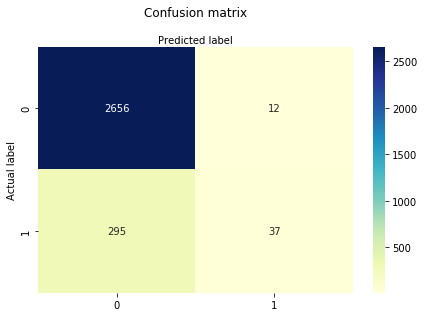

In [61]:
show_confusion(y_dev, y_pred)

* Check coefficients and scores

In [56]:
def show_roc(y_dev, y_proba):
    """
    Plot ROC and calculate AUC.
    
    Arguments:
    - y_dev:series,  true labels
    - y_proba: series, predicted probabilities of Class 1
    """
    logit_roc_auc = roc_auc_score(y_dev, y_proba)
    fpr, tpr, thresholds = roc_curve(y_dev, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")

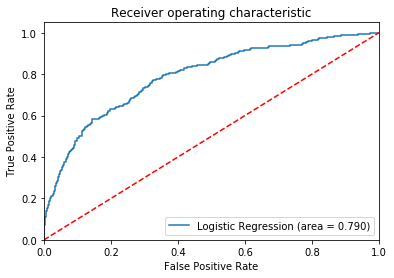

In [62]:
show_roc(y_dev, result.predict_proba(x_dev)[:,1])

In [53]:
print(list(x_train.columns))
print(result.coef_)

print("Accuracy:",accuracy_score(y_dev, y_pred))
print("Precision:",precision_score(y_dev, y_pred))
print("Recall:",recall_score(y_dev, y_pred))
print(classification_report(y_dev, y_pred) )


['cost_of_ad', 'prior_ins_tenure', 'device_type_desktop', 'device_type_laptop', 'device_type_other', 'gender_M', 'gender_Unknown', 'in_initial_launch_location_1', 'n_drivers_2', 'n_vehicles_2', 'n_vehicles_3']
[[-0.11840225 -0.09898854  0.42686376 -1.27914697 -1.56928626  1.07548205
  -0.4469899   1.04876419  0.87320989 -1.14817331 -1.77333103]]
Accuracy: 0.8976666666666666
Precision: 0.7551020408163265
Recall: 0.11144578313253012
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2668
           1       0.76      0.11      0.19       332

    accuracy                           0.90      3000
   macro avg       0.83      0.55      0.57      3000
weighted avg       0.88      0.90      0.86      3000



The signs of the coefficients are consistent with the results from EDA. We can see the overall accuracy is good but the recall is pretty low.

* Check the training error rate.

In [63]:
yy = result.predict(x_train)
print(accuracy_score(y_train,yy))
print(precision_score(y_train,yy))
print(recall_score(y_train,yy))

0.912
0.67
0.10307692307692308


The accuracy scores of the training sets and validation sets are pretty close. The model is more likely to have high bias.

* Try decreasing the regularization to see if the model inproves.

In [65]:
lr_model = LogisticRegression(C=100)

result = lr_model.fit(x_train,y_train.values.ravel())
y_pred = result.predict(x_dev)

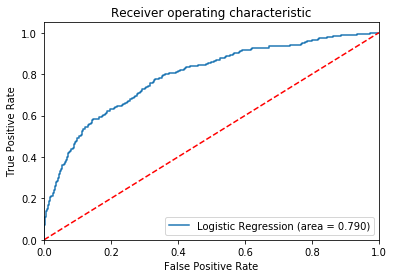

In [66]:
show_roc(y_dev, result.predict_proba(x_dev)[:,1])

In [67]:
print("Accuracy:",accuracy_score(y_dev, y_pred))
print("Precision:",precision_score(y_dev, y_pred))
print("Recall:",recall_score(y_dev, y_pred))
print(classification_report(y_dev, y_pred) )

Accuracy: 0.899
Precision: 0.7735849056603774
Recall: 0.12349397590361445
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2668
           1       0.77      0.12      0.21       332

    accuracy                           0.90      3000
   macro avg       0.84      0.56      0.58      3000
weighted avg       0.89      0.90      0.86      3000



The improvement is really tiny. Consider trying another method.

### 2.2 CatBoost 

In [68]:
from catboost import CatBoostClassifier

cab = CatBoostClassifier()
result = cab.fit(x_train,y_train.values.ravel())
cab_pred = cab.predict(x_dev)

Learning rate set to 0.023648
0:	learn: 0.6667545	total: 61.2ms	remaining: 1m 1s
1:	learn: 0.6399285	total: 64.8ms	remaining: 32.4s
2:	learn: 0.6184300	total: 67.9ms	remaining: 22.6s
3:	learn: 0.5980224	total: 71.2ms	remaining: 17.7s
4:	learn: 0.5738645	total: 74.4ms	remaining: 14.8s
5:	learn: 0.5568828	total: 77ms	remaining: 12.8s
6:	learn: 0.5392785	total: 80.1ms	remaining: 11.4s
7:	learn: 0.5228449	total: 82.8ms	remaining: 10.3s
8:	learn: 0.5082680	total: 85.9ms	remaining: 9.46s
9:	learn: 0.4958257	total: 88ms	remaining: 8.71s
10:	learn: 0.4824742	total: 91.1ms	remaining: 8.19s
11:	learn: 0.4704134	total: 93.3ms	remaining: 7.68s
12:	learn: 0.4576791	total: 96.5ms	remaining: 7.32s
13:	learn: 0.4452297	total: 99.5ms	remaining: 7.01s
14:	learn: 0.4347632	total: 103ms	remaining: 6.74s
15:	learn: 0.4229338	total: 106ms	remaining: 6.51s
16:	learn: 0.4144751	total: 109ms	remaining: 6.32s
17:	learn: 0.4035406	total: 113ms	remaining: 6.14s
18:	learn: 0.3955094	total: 115ms	remaining: 5.95s
1

176:	learn: 0.2178667	total: 1.12s	remaining: 5.21s
177:	learn: 0.2177721	total: 1.13s	remaining: 5.22s
178:	learn: 0.2175962	total: 1.14s	remaining: 5.22s
179:	learn: 0.2174282	total: 1.15s	remaining: 5.22s
180:	learn: 0.2172916	total: 1.15s	remaining: 5.22s
181:	learn: 0.2171399	total: 1.16s	remaining: 5.21s
182:	learn: 0.2170995	total: 1.16s	remaining: 5.19s
183:	learn: 0.2169877	total: 1.17s	remaining: 5.17s
184:	learn: 0.2169030	total: 1.18s	remaining: 5.19s
185:	learn: 0.2167891	total: 1.19s	remaining: 5.19s
186:	learn: 0.2166886	total: 1.19s	remaining: 5.18s
187:	learn: 0.2165712	total: 1.2s	remaining: 5.16s
188:	learn: 0.2164526	total: 1.2s	remaining: 5.15s
189:	learn: 0.2163886	total: 1.2s	remaining: 5.13s
190:	learn: 0.2162663	total: 1.21s	remaining: 5.11s
191:	learn: 0.2162564	total: 1.21s	remaining: 5.08s
192:	learn: 0.2161906	total: 1.21s	remaining: 5.07s
193:	learn: 0.2160512	total: 1.22s	remaining: 5.05s
194:	learn: 0.2159156	total: 1.22s	remaining: 5.03s
195:	learn: 0.2

364:	learn: 0.2026178	total: 2.07s	remaining: 3.6s
365:	learn: 0.2025137	total: 2.08s	remaining: 3.6s
366:	learn: 0.2024468	total: 2.08s	remaining: 3.59s
367:	learn: 0.2023550	total: 2.09s	remaining: 3.59s
368:	learn: 0.2022885	total: 2.1s	remaining: 3.59s
369:	learn: 0.2022186	total: 2.1s	remaining: 3.58s
370:	learn: 0.2021291	total: 2.11s	remaining: 3.57s
371:	learn: 0.2020749	total: 2.11s	remaining: 3.57s
372:	learn: 0.2020277	total: 2.12s	remaining: 3.56s
373:	learn: 0.2019651	total: 2.12s	remaining: 3.55s
374:	learn: 0.2018964	total: 2.13s	remaining: 3.55s
375:	learn: 0.2018299	total: 2.13s	remaining: 3.54s
376:	learn: 0.2017673	total: 2.14s	remaining: 3.53s
377:	learn: 0.2016956	total: 2.14s	remaining: 3.52s
378:	learn: 0.2016431	total: 2.15s	remaining: 3.52s
379:	learn: 0.2015704	total: 2.15s	remaining: 3.51s
380:	learn: 0.2014625	total: 2.15s	remaining: 3.5s
381:	learn: 0.2014015	total: 2.16s	remaining: 3.49s
382:	learn: 0.2013574	total: 2.16s	remaining: 3.48s
383:	learn: 0.201

528:	learn: 0.1913146	total: 3.21s	remaining: 2.86s
529:	learn: 0.1912659	total: 3.22s	remaining: 2.86s
530:	learn: 0.1912038	total: 3.23s	remaining: 2.85s
531:	learn: 0.1911276	total: 3.23s	remaining: 2.84s
532:	learn: 0.1910788	total: 3.23s	remaining: 2.83s
533:	learn: 0.1910330	total: 3.24s	remaining: 2.83s
534:	learn: 0.1909749	total: 3.24s	remaining: 2.82s
535:	learn: 0.1909263	total: 3.25s	remaining: 2.81s
536:	learn: 0.1908823	total: 3.25s	remaining: 2.8s
537:	learn: 0.1908116	total: 3.25s	remaining: 2.79s
538:	learn: 0.1907499	total: 3.26s	remaining: 2.79s
539:	learn: 0.1907107	total: 3.26s	remaining: 2.78s
540:	learn: 0.1906728	total: 3.26s	remaining: 2.77s
541:	learn: 0.1906239	total: 3.27s	remaining: 2.76s
542:	learn: 0.1905709	total: 3.27s	remaining: 2.75s
543:	learn: 0.1905045	total: 3.27s	remaining: 2.74s
544:	learn: 0.1904331	total: 3.28s	remaining: 2.74s
545:	learn: 0.1903694	total: 3.28s	remaining: 2.73s
546:	learn: 0.1903312	total: 3.28s	remaining: 2.72s
547:	learn: 0

690:	learn: 0.1835225	total: 3.97s	remaining: 1.77s
691:	learn: 0.1834697	total: 3.98s	remaining: 1.77s
692:	learn: 0.1834208	total: 4s	remaining: 1.77s
693:	learn: 0.1833829	total: 4s	remaining: 1.76s
694:	learn: 0.1833019	total: 4.02s	remaining: 1.76s
695:	learn: 0.1832612	total: 4.03s	remaining: 1.76s
696:	learn: 0.1831960	total: 4.03s	remaining: 1.75s
697:	learn: 0.1831550	total: 4.04s	remaining: 1.75s
698:	learn: 0.1830985	total: 4.05s	remaining: 1.74s
699:	learn: 0.1830657	total: 4.06s	remaining: 1.74s
700:	learn: 0.1830296	total: 4.07s	remaining: 1.74s
701:	learn: 0.1829682	total: 4.07s	remaining: 1.73s
702:	learn: 0.1829065	total: 4.08s	remaining: 1.72s
703:	learn: 0.1828539	total: 4.09s	remaining: 1.72s
704:	learn: 0.1828169	total: 4.1s	remaining: 1.71s
705:	learn: 0.1827397	total: 4.11s	remaining: 1.71s
706:	learn: 0.1827143	total: 4.13s	remaining: 1.71s
707:	learn: 0.1826763	total: 4.14s	remaining: 1.71s
708:	learn: 0.1826336	total: 4.16s	remaining: 1.71s
709:	learn: 0.18261

872:	learn: 0.1760534	total: 4.92s	remaining: 716ms
873:	learn: 0.1759936	total: 4.93s	remaining: 710ms
874:	learn: 0.1759619	total: 4.93s	remaining: 704ms
875:	learn: 0.1759355	total: 4.93s	remaining: 698ms
876:	learn: 0.1758955	total: 4.94s	remaining: 692ms
877:	learn: 0.1758782	total: 4.94s	remaining: 686ms
878:	learn: 0.1758297	total: 4.94s	remaining: 680ms
879:	learn: 0.1757898	total: 4.95s	remaining: 674ms
880:	learn: 0.1757645	total: 4.95s	remaining: 669ms
881:	learn: 0.1757220	total: 4.95s	remaining: 663ms
882:	learn: 0.1756960	total: 4.96s	remaining: 657ms
883:	learn: 0.1756568	total: 4.96s	remaining: 651ms
884:	learn: 0.1756492	total: 4.96s	remaining: 645ms
885:	learn: 0.1756194	total: 4.96s	remaining: 639ms
886:	learn: 0.1755996	total: 4.97s	remaining: 633ms
887:	learn: 0.1755615	total: 4.97s	remaining: 627ms
888:	learn: 0.1755428	total: 4.98s	remaining: 622ms
889:	learn: 0.1755085	total: 4.98s	remaining: 616ms
890:	learn: 0.1754835	total: 4.99s	remaining: 610ms
891:	learn: 

[[2638   30]
 [ 269   63]]


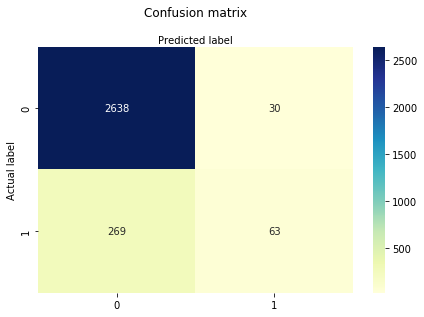

In [70]:
show_confusion(y_dev, cab_pred)

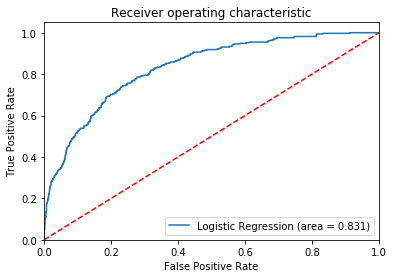

In [69]:
show_roc(y_dev, result.predict_proba(x_dev)[:,1])

In [73]:
print("Accuracy:",accuracy_score(y_dev, cab_pred))
print("Precision:",precision_score(y_dev, cab_pred))
print("Recall:",recall_score(y_dev, cab_pred))
print(classification_report(y_dev, cab_pred) )

Accuracy: 0.9003333333333333
Precision: 0.6774193548387096
Recall: 0.1897590361445783
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2668
           1       0.68      0.19      0.30       332

    accuracy                           0.90      3000
   macro avg       0.79      0.59      0.62      3000
weighted avg       0.88      0.90      0.87      3000



The AUC is satisfactory. While the precision score is a little lower than that of Logistic Regresion, the accuracy score and the recall score are higher. Again the overall accuracy is good but the recall is pretty low. From the confusion matrix we can see we have really high false negative rate (FNR).

* Check the predicted probability of being Class 1.

Text(0.5,1,'Histogram of Predicted Probability')

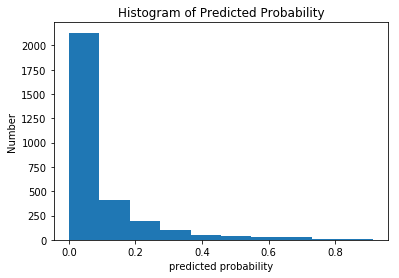

In [74]:
plt.hist(result.predict_proba(x_dev)[:,1])
plt.xlabel('predicted probability')
plt.ylabel('Number')
plt.title('Histogram of Predicted Probability')

We can see that most of the predicted probabilities are below 0.5, and are very small. We also note that in the training data we have the problem of imbalanced data and few sample are in Class 1. Now the threshold is 0.5, which is the Bayesian boundary resulting in the highest overall accuracy. In this case we should actually refer to the background. If the consequence of having a large false negative rate is more serious, then lowering the threshold may be reasonable. Lowering cutoff will result in more subjects being classified as Class 1, thus increasing the true positive rates and false positive rates. 

* F1-accuracy tradeoff

I try lowering the threshold to sacrifice some accuracy to decrease FNR. I start with searching for a boundary that enables a FNR of the training set around 0.5. 

In [75]:
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_roc_curve, select_threshold

catboost_pool = Pool(x_train,y_train.values.ravel())
roc_curve_values = get_roc_curve(cab, catboost_pool)
boundary = select_threshold(cab, curve=roc_curve_values, FNR=0.5)
print(boundary)

0.367381552814645


[[2600   68]
 [ 236   96]]


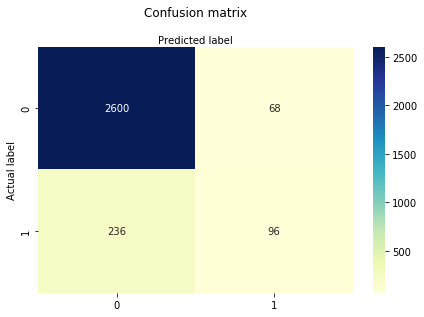

In [76]:
# set threshold to 0.36
show_confusion(y_dev, result.predict_proba(x_dev)[:,1] >0.36)

In [77]:
# set threshold to 0.36
print("Accuracy:",accuracy_score(y_dev, result.predict_proba(x_dev)[:,1] >0.36))
print("Precision:",precision_score(y_dev, result.predict_proba(x_dev)[:,1] >0.36 ))
print("Recall:",recall_score(y_dev, result.predict_proba(x_dev)[:,1] >0.36 ))

print(classification_report(y_dev, result.predict_proba(x_dev)[:,1] >0.36 ) )

Accuracy: 0.8986666666666666
Precision: 0.5853658536585366
Recall: 0.2891566265060241
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2668
           1       0.59      0.29      0.39       332

    accuracy                           0.90      3000
   macro avg       0.75      0.63      0.67      3000
weighted avg       0.88      0.90      0.88      3000



We can see the accuracy is almost unchanged but the F1 score has increased by nearly 10%. So we decided to go with this threshold of 0.36 for now.

In [79]:
test_pred = (result.predict_proba(test_final)[:,1]>0.36).astype(int)
print(test_pred.shape)

(10000,)


## 3. Conclusions

I have built a classification model using CatBoost to predict all the observations in the test dataset. From EDA, we see most of the features have an influence on the classification. In reality we will have better knowledge of the data and background to better understand which variables are categorical. Nevertheless, based on the property of the training data, I decide whether a variable is quantitative or categorical and select the predictors to use in the model. We also note we have the problem of imbalanced class and a small amount of missing data. For the missing labels in ${\tt gender}$, we assign a third label to them. For the imbalanced class problem which results in a high FNR, when we can't collect more data, the ideal way is to adjust the threshold based on the real problem, i.e., whether we are more concerned about incorrectly classifying sample of Class 1 as Class 0. Without the information available, finally I compare the accuracy and F1 score tradeoff and decide to go with a threshold of 0.36 to decrease the FNR while keeping the accuracy very close to the highest possible value.

I start with Logistic Regression but the AUC of 0.790 is not satisfactory. The accuracyof 0.90 is pretty high but the recall of 0.12 is pretty low as expected. The Logistic Regression model is likely underfitting the data. I tried decreasing regularization but the model did not improve much. Given more time, I could try selecting the best regularization parameter and solver using cross validation. But from an initial attempt, it is not likely to improve the performance significantly. 

Since 9 of 11 predictors are categorical, I turn to CatBoost, which is an open-source gradient boosting on decision trees library with categorical features support out of the box. The AUC of 0.831 is satisfactory. The final accuracy of 0.90 is pretty high but the final recall of 0.29 is a little low as expected. I have used this model to predict the labels of ${\tt outcome}$ of the 10,000 test data points. The first five predicted values are as below.

In [80]:
print(test_pred[0:5])

[0 0 0 0 0]
